# Week 9

# 14. Pandas

#### หากอยาก install พวก package หรือ update
- กรณี install
1. ให้ไปที่ anaconda navigator
2. แล้ว lunch "Powershell prompt"
3. พิม conda install และตามด้วยชื่อ package -> conda install pandas
- กรณี update
1. ให้ไปที่ anaconda navigator
2. แล้ว lunch "Powershell prompt"
3. พิม conda update และตามด้วยชื่อ package -> conda update pandas
- ปล.ถ้าไม่ได้ใช้ anaconda ให้พิม pip install หรือ pip update แล้วตามด้วยชื่อแพ็กเกจ

## Series and DataFrames
- series เหมือนกับ 1 column ใน excel
- dataframes คือ series รวมกันหลายๆ series
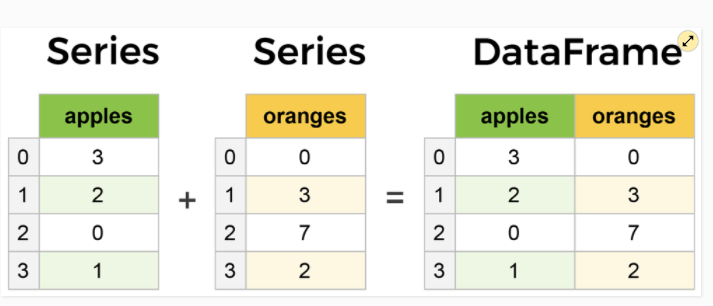

In [1]:
# import pandas มาใช้ method ของมัน
# หลังจากนี้ไฟล์นี้จะใช้ method ของ pandas ได้ตลอด
import pandas as pd # ตอนจะใช้คำสั่งของ padas ให้พิม pd. ข้างหน้าคำสั่ง

In [2]:
# dictionary of list
# ก็คือสร้าง list ขึ้นมาแล้วเอามาใส่เป็น dictionary
# แต่ละ item ที่อยู่ใน ditct ก็จะมี key เป็น apples และ value คือ series แต่ละ series ที่มีลักษณะเหมือน list
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
data

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}

In [3]:
# ตัวสร้าง DataFrame (DataFrame constructor) เป็น method ของ pandas
purchases = pd.DataFrame(data) # ดึง dictionary of list ที่ชื่อว่า "data" มาแปลงเป็นโครงสร้างของ DataFrame
purchases
# index จะเริ่มจาก 0

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [4]:
# เรียกมาดูใช้ตัวเลขของแถวนั้น
print(purchases.loc[3])

apples     1
oranges    2
Name: 3, dtype: int64


In [5]:
# เปลี่ยน/กำหนดชื่อ index แทนตัวเลข 0 1 2 3 ... เท่าที่เราใส่มา
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [6]:
# loc ย่อมาจาก locate เป็นการระบุชื่อแถว
purchases.loc['June'] # ขื่อdataframe.loc['ระบุชื่อของแถวที่เราต้องการดู']

apples     3
oranges    0
Name: June, dtype: int64

In [7]:
# ข้อมูลใน CSVs (Comma Separated Values) คือ text ไฟล์ ธรรมดา แต่ลักษณะเฉพาะคือ แต่ละแถวขั้นค่าแต่ละค่าด้วยเครื่องหมาย comma
# ไฟล์ใน SCB ช่องสุดท้าย ปริมาณการซื้อขาย / Volume 37461 board lot (ลองเปิดไฟล์ excel ไปดู)
# 1 board lot = 100 หุ้น
# ถ้าเปิดไฟล์ SCB ด้วย text แต่ละ column จะขั้นด้วยเครื่องหมาย Comma
df = pd.read_csv('SCB.csv') # คำสั่งที่ใช้ในการอ่านข้อมูลคือ read_csv
df
# มี 6 column คือ Date Open High Low Close และ Volume

,Date,Open,High,Low,Close,Volume
0,1/4/2000,45.50,46.00,45.25,45.75,37461
1,1/5/2000,43.50,44.25,43.00,43.50,27363
2,1/6/2000,43.75,43.75,42.25,42.50,11591
3,1/7/2000,43.00,44.00,42.50,43.75,9750
4,1/10/2000,44.50,45.25,43.75,43.75,17305
...,...,...,...,...,...,...
3909,12/24/2015,121.50,121.50,119.00,120.00,63196
3910,12/25/2015,120.00,120.50,119.00,120.00,20825
3911,12/28/2015,120.50,121.00,120.00,120.00,27628
3912,12/29/2015,120.00,120.00,118.50,120.00,39778


In [8]:
# เปลี่ยน column ที่ 0 / column แรก เป็น index
df = pd.read_csv('SCB.csv', index_col=0) 
df

,Open,High,Low,Close,Volume
Date,,,,,
1/4/2000,45.50,46.00,45.25,45.75,37461
1/5/2000,43.50,44.25,43.00,43.50,27363
1/6/2000,43.75,43.75,42.25,42.50,11591
1/7/2000,43.00,44.00,42.50,43.75,9750
1/10/2000,44.50,45.25,43.75,43.75,17305
...,...,...,...,...,...
12/24/2015,121.50,121.50,119.00,120.00,63196
12/25/2015,120.00,120.50,119.00,120.00,20825
12/28/2015,120.50,121.00,120.00,120.00,27628


In [9]:
# เปลี่ยน column Open เป็น index
df = pd.read_csv('SCB.csv', index_col='Open') 
df

,Date,High,Low,Close,Volume
Open,,,,,
45.50,1/4/2000,46.00,45.25,45.75,37461
43.50,1/5/2000,44.25,43.00,43.50,27363
43.75,1/6/2000,43.75,42.25,42.50,11591
43.00,1/7/2000,44.00,42.50,43.75,9750
44.50,1/10/2000,45.25,43.75,43.75,17305
...,...,...,...,...,...
121.50,12/24/2015,121.50,119.00,120.00,63196
120.00,12/25/2015,120.50,119.00,120.00,20825
120.50,12/28/2015,121.00,120.00,120.00,27628


In [10]:
# เปลี่ยน column date เป็น index
df = pd.read_csv('SCB.csv', index_col='Date') 
df

,Open,High,Low,Close,Volume
Date,,,,,
1/4/2000,45.50,46.00,45.25,45.75,37461
1/5/2000,43.50,44.25,43.00,43.50,27363
1/6/2000,43.75,43.75,42.25,42.50,11591
1/7/2000,43.00,44.00,42.50,43.75,9750
1/10/2000,44.50,45.25,43.75,43.75,17305
...,...,...,...,...,...
12/24/2015,121.50,121.50,119.00,120.00,63196
12/25/2015,120.00,120.50,119.00,120.00,20825
12/28/2015,120.50,121.00,120.00,120.00,27628


In [11]:
# การเขียนเป็นไฟล์ CSV หรือสร้างไฟล์ CSV จากที่เราสร้างด้วย python ขึ้นมา
# เราจะเรียก medthod ของ df มาใช้
df.to_csv("newSCB.csv")
# ลองเรียกมาใช้ใหม่
df1 = pd.read_csv('newSCB.csv')
df1
# บันทึกเป็นไฟล์ประเภทอื่นก็ได้เช่น json หรือ SQL
# df.to_json("newSCB.json")
# df.to_sql("newSCB", con)

,Date,Open,High,Low,Close,Volume
0,1/4/2000,45.50,46.00,45.25,45.75,37461
1,1/5/2000,43.50,44.25,43.00,43.50,27363
2,1/6/2000,43.75,43.75,42.25,42.50,11591
3,1/7/2000,43.00,44.00,42.50,43.75,9750
4,1/10/2000,44.50,45.25,43.75,43.75,17305
...,...,...,...,...,...,...
3909,12/24/2015,121.50,121.50,119.00,120.00,63196
3910,12/25/2015,120.00,120.50,119.00,120.00,20825
3911,12/28/2015,120.50,121.00,120.00,120.00,27628
3912,12/29/2015,120.00,120.00,118.50,120.00,39778


#### การอ่านข้อมูลจาก DataFrame

In [12]:
# แสดงข้อมูลส่วนแรก
df.head() # ถ้าเราใช้ method head โดยไม่ระบุตัวเลข จะแสดง 5 แถวแรก
print(df.head())
df.head(3) # แสดง 3 แถวแรก

            Open   High    Low  Close  Volume
Date                                         
1/4/2000   45.50  46.00  45.25  45.75   37461
1/5/2000   43.50  44.25  43.00  43.50   27363
1/6/2000   43.75  43.75  42.25  42.50   11591
1/7/2000   43.00  44.00  42.50  43.75    9750
1/10/2000  44.50  45.25  43.75  43.75   17305


,Open,High,Low,Close,Volume
Date,,,,,
1/4/2000,45.50,46.00,45.25,45.75,37461
1/5/2000,43.50,44.25,43.00,43.50,27363
1/6/2000,43.75,43.75,42.25,42.50,11591


In [13]:
# แสดงข้อมูลส่วนท้าย
print(df.tail()) # แสดง 5 แถวสุดท้าย
print(df.tail(10)) # แสดง 10 แถวสุดท้าย

             Open   High    Low  Close  Volume
Date                                          
12/24/2015  121.5  121.5  119.0  120.0   63196
12/25/2015  120.0  120.5  119.0  120.0   20825
12/28/2015  120.5  121.0  120.0  120.0   27628
12/29/2015  120.0  120.0  118.5  120.0   39778
12/30/2015  119.5  120.0  118.5  119.5   27342
             Open   High    Low  Close  Volume
Date                                          
12/17/2015  127.0  127.0  125.5  126.5   79678
12/18/2015  125.5  126.0  121.5  121.5   53995
12/21/2015  120.0  124.0  119.5  122.5   71899
12/22/2015  123.0  123.5  119.0  119.0   72063
12/23/2015  120.5  121.5  119.5  120.5   49340
12/24/2015  121.5  121.5  119.0  120.0   63196
12/25/2015  120.0  120.5  119.0  120.0   20825
12/28/2015  120.5  121.0  120.0  120.0   27628
12/29/2015  120.0  120.0  118.5  120.0   39778
12/30/2015  119.5  120.0  118.5  119.5   27342


In [14]:
# แสดง info ของ dataframe
df.info()
# df นี้มี Index: 3914 แถว ก้คือตั้งแต่ 1/4/2000 ก็คือ index 0 ถึง 12/30/2015 คือ index ตัวสุดท้ายของ dataframe นี้
# non null คือ นับเฉพาะแถวที่มีข้องมูล แสดงว่ามีข้อมูล 3914 แถว หรือว่าข้อมูลใส่ครบทุกแถวนั่นเอง
# แสดง data type ด้วย
df1.info() # ยังไม่ได้เปลี่ยน column แรกเป็น Date

<class 'pandas.core.frame.DataFrame'>
Index: 3914 entries, 1/4/2000 to 12/30/2015
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3914 non-null   float64
 1   High    3914 non-null   float64
 2   Low     3914 non-null   float64
 3   Close   3914 non-null   float64
 4   Volume  3914 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 183.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3914 non-null   object 
 1   Open    3914 non-null   float64
 2   High    3914 non-null   float64
 3   Low     3914 non-null   float64
 4   Close   3914 non-null   float64
 5   Volume  3914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 183.6+ KB


In [15]:
# แสดงรูปร่าง ก็คือ บอกขนาดของ dataframe (จำนวนแถว, จำนวนคอลัมน์)
df.shape

(3914, 5)

In [16]:
# append คือเอาอะไรซักอย่างมาต่อท้าย
# ต่อท้าย dataframe แรกด้วย dataframe ที่2
temp_df = df.append(df) # ในวงเล็บคือเอา df มาต่อท้าย
print(df.shape)
print(temp_df.shape) # row/แถว เพิ่มเป็น 2 เท่า เพราะเอา df ตัวเองมาต่อแถว

# ถ้าอยากเอาตัวเองมาต่อท้ายตัวเองโดยไม่สร้าง dataframe ใหม่ให้
# df = df.append(df)
# สังเกตผลที่ออกมาว่าไม่มีผลต่อกันด้วยคำสั่ง append

(3914, 5)
(7828, 5)


In [17]:
# ถ้าเราอยากกำจัดข้อมูลซ้ำซ้อนให้
# inplace = True คือ เวลาที่ drop duplicates เสร็จแล้วผลลัพธ์ที่ได้ให้เปลี่ยนแปลงใน temp_df เลยโดยไม่ต้องสร้างเป็น copy ใหม่ขึ้นมา
# ถ้าไม่ใส่ inplace = True drop duplicates df จะไม่เปลี่ยนแปลงเพราะ คำสั่งจะสร้างตัวแปรใหม่ขึ้นมา
df.drop_duplicates(inplace = True) # ขจัดตัวที่ซ้ำกันก่อน
df = df.append(df.tail(2)) # เอาสองแถวสุดท้ายมาต่อเพิ่ม สังเกตว่าวันที่จำซ้ำกัน
print(df.tail(5))
print(df.shape)
# ผลลัพธ์จึงออกมา 3916 เพิ่มมา 2 แถวที่เราสั่งเพิ่มแถวท้าย

             Open   High    Low  Close  Volume
Date                                          
12/28/2015  120.5  121.0  120.0  120.0   27628
12/29/2015  120.0  120.0  118.5  120.0   39778
12/30/2015  119.5  120.0  118.5  119.5   27342
12/29/2015  120.0  120.0  118.5  120.0   39778
12/30/2015  119.5  120.0  118.5  119.5   27342
(3916, 5)


In [18]:
# กรณี drop_duplicates แล้วใส่ inplace = True

df.drop_duplicates(inplace = True) # ขจัดตัวที่ซ้ำกันอีกครั้ง
print(df.tail(5))
print(df.shape)
# ผลลัพธ์เหลือ 3914 เพราะลบตัวซ้ำที่เราเพิ่มขึ้นมา

             Open   High    Low  Close  Volume
Date                                          
12/24/2015  121.5  121.5  119.0  120.0   63196
12/25/2015  120.0  120.5  119.0  120.0   20825
12/28/2015  120.5  121.0  120.0  120.0   27628
12/29/2015  120.0  120.0  118.5  120.0   39778
12/30/2015  119.5  120.0  118.5  119.5   27342
(3914, 5)


In [19]:
# กรณี drop_duplicates แล้วไม่ใส่ inplace = True

print(df.shape) # คำตอบแรกเป็นขนาดดั้งเดิมของ df
df.append(df.tail(2)) # เอาสองแถวสุดท้ายมา append ต่อเข้าไป
print(df.shape) # df มีขนาดเท่าเดิมเพราะ method append นี้ ไม่ได้มีผลต่อ df เดิม แต่เป็นการสร้าง copy ของ df เดิมมาใหม่แล้วค่อย append เข้าไป
df = df.append(df.tail(2)) # วิธีทำให้ df เปลี่ยนไป ก็คือเอา copy df ตัวใหม่ไปแทน df เดิม
print(df.shape) # ขนาดจะเปลี่ยนไปเพราะเราเอาตัว copy มาใช้
df.drop_duplicates() # ให้ผลเหมือนบรรทัดก่อนคือ มันไม่ได้ลดลงเพราะ method สร้าง copy ใหม่ขึ้นมาแล้วค่อย duplicates
print(df.shape)
df = df.drop_duplicates() # เอาตัว copy มาแทน df เดิมจึงเป็นการกำหนดค่า df ใหม่
print(df.shape) # ผลคือตัวซ้ำหายไป

(3914, 5)
(3914, 5)
(3916, 5)
(3916, 5)
(3914, 5)


In [20]:
# keep เก็บ ขณะ drop_duplicates
# first: (default ถ้าไม่ใส่คำสั่งนี้จะใช้ first เป็นหลัก) จะเก็บตัวแรกเอาไว้
# last: เก็บตัวสุดท้ายเอาไว้
# False: ลบแถวทุกอันที่ซ้ำกันออกทั้งหมด
# ดังนั้น first เก็บแถวแรกที่ซ้ำ กับ last เก็บแถวสุดท้ายที่ซ้ำ ต่างกันแค่ลำดับการเก็บข้อมูลเท่านั้น
# df = df.append(df)  # make a new copy
# df.drop_duplicates(inplace=True, keep=False).shape # ผลคือลบแถวที่ซ้ำกันทั้งหมด

In [21]:
print(df.columns)
# เหลือแค่ 5 columns เพราะ date เราเอาไปกำหนดเป็น index column แล้ว

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [22]:
# เปลี่ยนชื่อวิธีแรก โดยเปลี่ยนชื่อ column ไม่กี่ตัว

# columns เป็นเหมือน dictionary
# key คือชื่อเดิม value คือชื่อใหม่
df.rename(columns ={'Volume':'Volume (Boardlot)'}, inplace = True)
print(df)
print(df.columns)

              Open    High     Low   Close  Volume (Boardlot)
Date                                                         
1/4/2000     45.50   46.00   45.25   45.75              37461
1/5/2000     43.50   44.25   43.00   43.50              27363
1/6/2000     43.75   43.75   42.25   42.50              11591
1/7/2000     43.00   44.00   42.50   43.75               9750
1/10/2000    44.50   45.25   43.75   43.75              17305
...            ...     ...     ...     ...                ...
12/24/2015  121.50  121.50  119.00  120.00              63196
12/25/2015  120.00  120.50  119.00  120.00              20825
12/28/2015  120.50  121.00  120.00  120.00              27628
12/29/2015  120.00  120.00  118.50  120.00              39778
12/30/2015  119.50  120.00  118.50  119.50              27342

[3914 rows x 5 columns]
Index(['Open', 'High', 'Low', 'Close', 'Volume (Boardlot)'], dtype='object')


In [23]:
# เปลี่ยนชื่อวิธีสอง ต้องการเปลี่ยนชื่อ columns หลายๆ columns
df.columns = ['open', 'high', 'low', 'close', 'volume'] # กำหนด list ที่เป็นชื่อ columns ใหม่
print(df.columns) # เปลี่ยนตัวใหญ่เป็นตัวเล็ก

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


• การทำงานกับ missing value หรือ ค่าที่ขาดหาย

In [24]:
# check ว่ามีข้อมูลขาดหายไหม
# ถ้าอันไหนไม่ใช่ null(ข้อมูลหาย) ผลจะออกมาเป็น false
# ถ้า null ผลออกมาเป็น True
df.isnull() # แสดงแค่ head กับ tail เพราะข้อมูลเยอะทำให้ไม่เห็นข้อมูลทั้งหมด

,open,high,low,close,volume
Date,,,,,
1/4/2000,False,False,False,False,False
1/5/2000,False,False,False,False,False
1/6/2000,False,False,False,False,False
1/7/2000,False,False,False,False,False
1/10/2000,False,False,False,False,False
...,...,...,...,...,...
12/24/2015,False,False,False,False,False
12/25/2015,False,False,False,False,False
12/28/2015,False,False,False,False,False


In [25]:
# check ว่ามี null ไหม (check จำนวน missing value)
print(df.isnull().sum())
# ถ้าผลรวมของค่า null เป็น 0 ทั้งหมดแปลว่าไม่มีค่าว่างเลย
# ถ้าผลรวมตัวใด้ตัวหนึ่งมีค่าผลรวมออกมา เช่น open มีเลข 128 แปลว่ามีค่าว่าง 128 ช่อง
# เพราะ false มีค่าเป็น 0 เอามารวมกันก้เป็น 0 
# และ True มีค่าเป็น 1 ถ้าหาย 10 ตัวก็มีผลรวมเป็น 10

open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [26]:
# วิธี 1 วิธีจัดการกับข้อมูลที่เป็น null โดยลบแถวหรือคอลัมน์
# ถ้ามีค่าว่างสามารถลบแถวที่มีค่าว่างได้
# กรณีลบแถว
df.dropna() # drop na คือ drop not avaliable แถวไหนที่มีค่าว่างจะลบข้อมูลทั้งแถวนั้น

# กรณีต้องการลบ column ที่มีค่าว่างอยู่
df.dropna(axis=1) # axis = แกน
# ถ้ากำหนด axis = 0 คือต้องการลบแถว โดยเป็นค่า defalt อยู่แล้วไม่ต้องกำหนด
# ถ้ากำหนด axis = 1 คือต้องการลบคอลัมน์ column ใดมีค่าว่างจะลบทั้ง column นั้น

,open,high,low,close,volume
Date,,,,,
1/4/2000,45.50,46.00,45.25,45.75,37461
1/5/2000,43.50,44.25,43.00,43.50,27363
1/6/2000,43.75,43.75,42.25,42.50,11591
1/7/2000,43.00,44.00,42.50,43.75,9750
1/10/2000,44.50,45.25,43.75,43.75,17305
...,...,...,...,...,...
12/24/2015,121.50,121.50,119.00,120.00,63196
12/25/2015,120.00,120.50,119.00,120.00,20825
12/28/2015,120.50,121.00,120.00,120.00,27628


• วิธี 2 วิธีจัดการกับข้อมูลที่เป็น null แทนค่าตรงนันด้วยค่าเฉลี่ย
1. revenue = movies_df['revenue_millions'] # สร้าง series ใหม่ขึ้นมาโดยใช้ column ใด column หนึ่งของ df ที่เราต้องการมาสร้าง series ใหม่
2. drop na คือลบค่าว่าง , fillna เพิ่มข้อมูลลงในค่าว่าง
3. revenue.fillna(revenue_mean, inplace = True) เอาค่าเฉลี่ยนมาแทนในช่องว่าง นำใส่ inplace เข้าไปทำให้มีผลต่อ movie_df ด้วย

In [27]:
# Descriptive Statistics คือ สถิติเชิงพรรณนา 
# สามารถคำนวนจากแต่ละ column ได้ หรือทุกคอลัมน์ก็ได้
print(df['volume'].describe()) # เลือกหาค่าทางสถิติของ column ที่ชื่อว่า volume
print(df.describe()) # หาค่าทางสถิติของทุกคอลัมน์

count    3.914000e+03
mean     6.505027e+04
std      5.626113e+04
min      8.390000e+02
25%      2.889575e+04
50%      5.366400e+04
75%      8.542975e+04
max      1.286183e+06
Name: volume, dtype: float64
              open         high          low        close        volume
count  3914.000000  3914.000000  3914.000000  3914.000000  3.914000e+03
mean     82.948454    83.872560    81.934019    82.920401  6.505027e+04
std      51.645922    52.045887    51.188253    51.653700  5.626113e+04
min      13.500000    13.900000    13.500000    13.500000  8.390000e+02
25%      43.250000    44.000000    42.750000    43.250000  2.889575e+04
50%      69.000000    69.500000    68.000000    69.000000  5.366400e+04
75%     119.000000   120.000000   118.000000   119.000000  8.542975e+04
max     197.000000   199.500000   196.000000   197.500000  1.286183e+06


In [28]:
# Correlation Analysis หรือ สหสัมพันธ์
# วิธีสร้าง correlation table ของ dataflame นี้
print(df.corr()) # เป็นค่าทางสถิติที่บอกว่าตัวแปรไหนมีความสัมพันธ์กับตัวแปรไหนบ้าง
# ค่า correlation มีค่าได้ตั้งแต่ -1 ถึง 1
# ถ้ามีค่าเป็น 1 แสดงว่ามีค่าสหสัมพันธ์เชิงบวกอย่างสมบูรณ์ ถ้าแปรตัวนึงมีค่าเพิ่มขึ้นแสดงว่าอีกตัวแปรนึงจะมีทิศทางเดียวกันที่เพิ่มขึ้นด้วย
# ดังนั้นตัวแรก open และ open เป็นตัวเดียวกันทำให้มีสหสัมพันธ์เชิงบวกก็คือ 1
# เช่นเดียวกันในแนวทแยง เช่น volume กับ volume ก็จะเป็น 1
# ระหว่างราคากับราคา สหสัมพันธ์จะสูงมาก แต่ระหว่าง ราคาต่างๆกับvolume จะไม่ค่อยมีความเกี่ยวข้องกัน หรือ มีสหสัมพันธ์ต่ำมาก
# ถ้าต่ำกว่า 0.2 แปลว่าไม่มีสหสัมพันธ์

            open      high       low     close    volume
open    1.000000  0.999812  0.999814  0.999575  0.181681
high    0.999812  1.000000  0.999787  0.999826  0.187727
low     0.999814  0.999787  1.000000  0.999808  0.178269
close   0.999575  0.999826  0.999808  1.000000  0.184324
volume  0.181681  0.187727  0.178269  0.184324  1.000000


# Week 10

In [29]:
# การ Slide
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume'] # ทำให้กลับมาเป็นตัวใหญ๋เหมือนเดิม ตอนแรกชื่อ columns เราเป็นตัวเล็ก 
close = df['Close'] # ถ้าใช้สัญลักษณ์ [] แ่ค่ครั้งเดียว จะแสดงแค่ตัวแปร close ออกมา
print(close)

Date
1/4/2000       45.75
1/5/2000       43.50
1/6/2000       42.50
1/7/2000       43.75
1/10/2000      43.75
               ...  
12/24/2015    120.00
12/25/2015    120.00
12/28/2015    120.00
12/29/2015    120.00
12/30/2015    119.50
Name: Close, Length: 3914, dtype: float64


In [30]:
# การ Extract
close_df = df[['Close']] # ถ้าใส่ก้ามปูสองครั้งเรียกว่า extract(การสกัด)
# ก้ามปูชั้นแรก  สกัด columns ที่ชื่อว่า Close ออกมา
# ก้ามปูชั้นสองจะเอาตัว columns นั้นมาสร้าง dataflame ใหม่
# ดังนั้น clost_df นี้จะเป็น dataflame ใหม่ที่มีเพียง column เดียว
print(close_df)
# close กับ close_df ไม่เหมือนกัน
# close หมายถึง column ที่ชื่อว่า close ใน df
# close_df หมายถึง dataflame ใหม่ ที่มี close เป็นคอลัมน์เดียวที่มี

             Close
Date              
1/4/2000     45.75
1/5/2000     43.50
1/6/2000     42.50
1/7/2000     43.75
1/10/2000    43.75
...            ...
12/24/2015  120.00
12/25/2015  120.00
12/28/2015  120.00
12/29/2015  120.00
12/30/2015  119.50

[3914 rows x 1 columns]


In [34]:
# loc และ iloc เป็น property ไม่ใช่ method
# เป็น property ของ dataflame ในการอ้างถึงแถว
# Locate คือการระบุแถว
# .loc ต้องอ้างชื่อของแถว ในที่นี้เราระบุด้วยวันที่ เราจะต้องอ้างวันที่เพื่อเรียกแถวนั้นออกมา
# ถ้าเราไม่มีการเปลี่ยน index จะใช้คำสั่ง .loc ไม่ได้ต้องไปใช้ iloc แล้วระบุ index แทน
anotherDay = df.loc['12/24/2015']
print(anotherDay)

Open        121.5
High        121.5
Low         119.0
Close       120.0
Volume    63196.0
Name: 12/24/2015, dtype: float64


In [37]:
# .iloc ต้องระบุ index
# แถวแรกเป็นหมายเลข 0 เหมือน index ปกติ
aDay = df.iloc[15]
print(aDay)

Open        44.25
High        44.25
Low         43.25
Close       44.25
Volume    7996.00
Name: 1/25/2000, dtype: float64


In [39]:
# กำหนดเป็นช่วง ใช้ loc ก็พิมชื่อแถวแรกที่ต้องการจนถึงชื่อแถวสุดท้ายที่ต้องการ
firstPeriod = df.loc['12/25/2015':'12/29/2015']
print(firstPeriod)

             Open   High    Low  Close  Volume
Date                                          
12/25/2015  120.0  120.5  119.0  120.0   20825
12/28/2015  120.5  121.0  120.0  120.0   27628
12/29/2015  120.0  120.0  118.5  120.0   39778


In [41]:
# กำหนดเป็นช่วงเหมือนกัน แต่ใช้ iloc ดังนั้นต้องกำหนดเลขแถวที่ต้องการ
secondPeriod = df.iloc[2501:2508] # แถว 2502 ถึงแถว 2509 (index เริ่มที่ 0)
print(secondPeriod)

            Open   High    Low  Close  Volume
Date                                         
3/17/2010  89.75  90.75  89.25  90.25  105113
3/18/2010  90.25  90.50  88.75  88.75   79611
3/19/2010  89.50  93.25  89.50  93.00  182325
3/22/2010  92.00  96.00  91.00  92.00  234722
3/23/2010  92.25  93.50  90.50  91.25  111388
3/24/2010  92.50  94.75  92.50  94.00  214029
3/25/2010  94.25  95.00  93.00  94.00  131004


In [42]:
print(df.shape)
# สัญลักษณ์เงื่อนไขเช่น >(มากกว่า), <(น้อยกว่า), ==(เท่ากัน), !=(ไม่เท่ากัน)
df = df[df['Close']>df['Open']]
print(df)
print(df.shape)

(3914, 5)
              Open    High     Low   Close  Volume
Date                                              
1/4/2000     45.50   46.00   45.25   45.75   37461
1/7/2000     43.00   44.00   42.50   43.75    9750
1/12/2000    42.75   43.75   42.75   43.75    5430
1/14/2000    44.00   44.50   43.75   44.50    8893
1/18/2000    45.00   46.25   45.00   46.25   18248
...            ...     ...     ...     ...     ...
12/3/2015   130.00  131.50  129.00  130.50   47962
12/14/2015  119.00  123.50  118.50  123.50   80572
12/15/2015  123.50  124.50  122.50  124.50   76038
12/16/2015  125.00  127.00  124.50  125.50  126258
12/21/2015  120.00  124.00  119.50  122.50   71899

[1550 rows x 5 columns]
(1550, 5)


In [44]:
# การเชื่อมเงื่อนไขด้วย Operator พวก "หรือ(|)" กับ "และ (&)"
# แต่ละเงื่อนไขต้องอยู่ใน () วงเล็บ
# เมื่อเราใส่ทั้งสองเงื่อนไขแล้วเชื่อมด้วย &(และ) แปลว่าทั้งสองเงื่อนไขจะต้องเป็นจริงถึงจะนำแต่ละแถวไปใส่ใน df2 ได้
df2 = df[(df['High'] > df['Open']*1.05) & (df['Volume'] > 10000)] # เลือกราคาสูงสุดสูงกว่าราคาเปิด 5% และ Volume ต้องสูงกว่า 10000 board lot
print(df2) # ปริ้นเพื่อดูว่ามีกี่แถวที่ตรงตามเงื่อนไขนี้จาก 1550 แถวที่เหลืออยู่ (จากการใช้คำสั่งก่อนหน้านี้)
# จาก 1550 แถวมี 97 แถวที่ตรงตามเงื่อนไข หรือเป็นจริง

              Open    High     Low   Close  Volume
Date                                              
2/23/2000    31.50   33.50   31.00   33.25   18530
3/2/2000     28.25   31.00   28.25   30.75   29043
5/31/2000    23.00   25.25   23.00   24.25   17818
6/15/2000    23.75   25.50   23.25   24.25   31005
7/25/2000    16.00   17.00   15.75   16.75   23285
...            ...     ...     ...     ...     ...
10/21/2011  100.50  106.00   99.75  102.00  142241
3/19/2012   144.00  151.50  144.00  148.50  101472
9/9/2013    144.50  152.00  143.50  152.00  143870
1/6/2014    132.00  140.00  130.50  140.00  127983
1/13/2014   139.50  147.00  139.50  147.00   83479

[97 rows x 5 columns]


In [46]:
# สัญลักษณ์ | อยู่ใต้ enter สัญลักษณ์นี้เรียกว่า หรือ
df2 = df[(df['High'] > df['Open']*1.05) | (df['Volume'] > 10000)] # เลือกราคาสูงสุดสูงกว่าราคาเปิด 5% หรือ Volume ต้องสูงกว่า 10000 board lot
print(df2)
# ใช้สัญลักษณ์ | หมายความว่าถ้าเงื่อนไขใดเงื่อนไขนึงเป็นจริงแถวนั้นก็จะไปอยู่ใน df2
# มี 1468 แถวจาก 1550 แถวที่มีเงื่อนไขเป็นจริงตามที่กำหนดไว้ 

              Open    High     Low   Close  Volume
Date                                              
1/4/2000     45.50   46.00   45.25   45.75   37461
1/18/2000    45.00   46.25   45.00   46.25   18248
1/19/2000    45.50   46.50   45.50   46.50   20148
2/10/2000    39.50   40.00   39.25   39.75   10142
2/15/2000    37.25   38.50   36.75   37.75   16159
...            ...     ...     ...     ...     ...
12/3/2015   130.00  131.50  129.00  130.50   47962
12/14/2015  119.00  123.50  118.50  123.50   80572
12/15/2015  123.50  124.50  122.50  124.50   76038
12/16/2015  125.00  127.00  124.50  125.50  126258
12/21/2015  120.00  124.00  119.50  122.50   71899

[1468 rows x 5 columns]


In [48]:
# ใช้ method ที่ชื่อ .isin() ข้างในวงเล็บต้องใส่ list
df2 = df[df['Close'].isin([45.00,50.00,55.00,60.00])] # ถ้ามีราคาปิดอยู่ใน list ที่ใส่ไว้ในวงเล็บ ให้เลือกแถวนั้นมาใส่ใน df2 ตามเงื่อนไขนี้
print(df2)
# จะพบว่ามีราคาปิดที่ตรงตามเงื่อนไขอยู่หลายวัน
print(df2.shape) # มี 33 วันหรือแถว ที่มีเงื่อนไขตรง หรือมีราคาปิดตรงกับ list ที่ใส่ไว้ในคำสั่ง

             Open   High    Low  Close  Volume
Date                                          
12/24/2003  47.00  50.50  47.00   50.0  184709
2/20/2004   49.50  50.50  48.50   50.0   76909
5/27/2004   44.50  45.50  44.25   45.0  122766
8/19/2004   44.50  45.25  44.50   45.0   65693
10/7/2004   44.75  45.25  44.50   45.0   64436
11/4/2004   44.75  45.00  44.25   45.0   64750
11/19/2004  49.50  50.00  49.25   50.0  140231
11/23/2004  49.50  50.00  49.25   50.0   58862
11/29/2004  49.25  50.00  48.75   50.0  122987
12/1/2004   49.75  50.00  49.50   50.0   81965
12/15/2004  49.25  50.00  49.25   50.0   64159
12/27/2004  49.00  50.00  48.50   50.0  104984
3/17/2005   49.50  50.00  49.25   50.0   41881
5/9/2005    49.50  50.00  49.25   50.0   52237
10/5/2005   49.75  50.00  49.75   50.0   26272
11/4/2005   49.75  50.50  49.25   50.0   87650
12/14/2005  49.50  50.00  49.50   50.0   78627
12/23/2005  49.75  51.00  49.75   50.0   34160
2/20/2006   59.00  60.00  58.00   60.0   82176
2/21/2006   5

In [49]:
# กรณีหลายๆเงื่อนไข
# movies_df[
#     ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
#     & (movies_df['rating'] > 8.0)
#     & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
# ]

In [54]:
# เราสามารถนำฟังก์ชันมา apply function ที่เราเขียนโดยการส่งค่าของแต่ละ column มาพิจารณาในฟังก์ชันได้และก็สร้างเป็น column ใหม่ขึ้นมาได้
def volumeDef(x):
    if x >= 100000:
        return "High Volume"
    else:
        return "Low Volume"
    
df['VolumeDefinition'] = df['Volume'].apply(volumeDef)
print(df)

              Open    High     Low   Close  Volume VolumeDefinition
Date                                                               
1/4/2000     45.50   46.00   45.25   45.75   37461       Low Volume
1/7/2000     43.00   44.00   42.50   43.75    9750       Low Volume
1/12/2000    42.75   43.75   42.75   43.75    5430       Low Volume
1/14/2000    44.00   44.50   43.75   44.50    8893       Low Volume
1/18/2000    45.00   46.25   45.00   46.25   18248       Low Volume
...            ...     ...     ...     ...     ...              ...
12/3/2015   130.00  131.50  129.00  130.50   47962       Low Volume
12/14/2015  119.00  123.50  118.50  123.50   80572       Low Volume
12/15/2015  123.50  124.50  122.50  124.50   76038       Low Volume
12/16/2015  125.00  127.00  124.50  125.50  126258      High Volume
12/21/2015  120.00  124.00  119.50  122.50   71899       Low Volume

[1550 rows x 6 columns]


<ipython-input-54-582f9a3eda57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VolumeDefinition'] = df['Volume'].apply(volumeDef)


# Module : matplotlib

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2021-10-15  21.500000  21.200001  21.299999  21.400000  5909300.0  21.400000
2021-10-18  21.600000  21.200001  21.600000  21.500000  2682800.0  21.500000
2021-10-19  21.600000  21.000000  21.600000  21.299999  7318200.0  21.299999
2021-10-20  21.600000  21.200001  21.200001  21.600000  5790100.0  21.600000
2021-10-21  21.700001  21.400000  21.500000  21.600000  2431300.0  21.600000


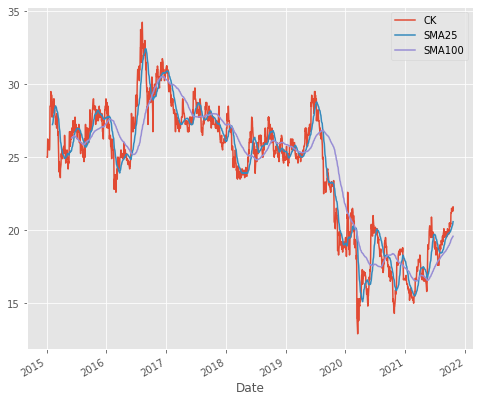

In [2]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web # ใช้อ่านข้อมูลจากในเว็บ

start = dt.datetime(2015, 1, 1)  # เลือกวันเริ่มต้นเป็น ปี 2015 เดือน 1 วันที่ 1
end = dt.datetime.now() # end เป็นวันที่ปัจจุบัน
# สร้าง dataflame ที่ชื่อว่า df โดยใช้การอ่านข้อมูลจากเว็บ
# เราอ้างถึง method ที่ชื่อว่า DataReader และอ้างถึงหลักทรัพย์ที่เราจะอ่านข้อมูลก็คือ
# CK คือชอการช่าง นามสกุล .BK คือเป็นการระบุว่าอยู่ในตลาดหลักทรัพย์ในประเทศไทยของกรุงเทพ, อ่านข้อมูลจาก yahoo finance
# กำหนดวันที่เริ่มต้น(start) และวันที่สิ้นสุด(end)
# หมายความว่าไปอ่านข้อมูลจากเว็บ yahoo finance โดยจะไปดึงข้อมูลราคาหลักทรัพย์ CK ในช่วงเวลาที่เรากำหนด
df = web.DataReader("CK.BK", 'yahoo', start, end)
print(df.tail())
close = df['Close'] # ใช้วิธีการ slide โดยเลือกบาง column ก็คือ ราคาปิด/'Close
# อธิบายเรื่อง method ค่าเฉลี่ยเคลื่อนที่อย่างง่าย
# สมมติเราจะสร้างเส้นค่าเฉลี่ยเคลื่อนที่อย่างง่าย 3 วัน
# ค่าเฉลี่ยเคลื่อนที่คือ เช่น ข้อมูลราคามีอยู่ 10 วัน เราจะหาค่าเฉลี่ยเคลื่อนที่ของ 3 วันดังนั้น
# ค่าเฉลี่ยตัวแรกจะเป็นค่าเฉลี่ยของวันที่ 1 2 3 ค่าเฉลี่ยตัวที่สองจะเป็นของวันที่ 2 3 4 ค่าเฉลี่ยตัวที่สามจะเป็นของวัน 3 4 5 แบบนี้ไปเรื่อยๆจนครบ 10 วัน
# คำนวนเส้นค่าเฉลี่ยเคลื่อนที่ 2 เส้น คือ mavg1 และ mavg2
# อนุกรมเวลา คือ เซตของข้อมูลเชิงปริมาณที่จัดเก็บในช่วงเวลาติดต่อกัน
mavg1 = close.rolling(window=25).mean() # 1 อนุกรมเวลา # ค่าเฉลี่ยเคลื่อนที่หน้าต่าง(window) 25 วันย้อนหลัง
mavg2 = close.rolling(window=100).mean() # 1 อนุกรมเวลา # ค่าเฉลี่ยเคลื่อนที่หน้าต่าง(window) 100 วันย้อนหลัง
mpl.rc('figure', figsize=(8, 7)) # กำหนดให้ mathplotlib มีขนาด(size) เป็น 8 กับ 7
mpl.style.use('ggplot') # กำหนด style ที่ใช้เป็น ggplot
# plot graph ทั้งหมด 3 เส้นคือ 
close.plot(label='CK') # 1. เส้นราคาปิดปกติ(close)ที่อ่านข้อมูลมาจากเว็บ
mavg1.plot(label='SMA25') # 2. เส้นค่าเฉลี่ยเคลื่อนที่ 25 วัน ที่คำนวณไว้ใน mavg1
mavg2.plot(label='SMA100') # 3. เส้นค่าเฉลี่ยเคลื่อนที่ 100 วัน ที่คำนวณไว้ใน mavg2
plt.legend() # กำหนดให้กราฟที่ plot ขึ้นมาซึ่งเรียกว่า pyplot ให้ object นี้สร้าง legend ขึ้นมา
# legned คือ จาก 3 เส้นนี้มันใช้สัญลักษณ์อะไรของแต่ละเส้นโดยให้อธิบาย
# ที่เรา plot กราฟขึ้นมามันจะยังไม่ show กราฟขึ้นมา มันแค่ทำเก็บไว้เฉยๆ
# การที่จะแสดงกราฟนี้ขึ้นมาต้องใช้ method ที่ชื่อว่า show คือให้โชว์กราฟที่ plot ออกมาบนหน้าจอ 
plt.show() 

# สิ่งที่แสดงคือ 5 แถวล่าสุุดจ่าก df.tail อ่านออกมามี date เป็น index และมี Adjusted Close คือ ยังไม่อธิบาย 5555
# อ่านมาจาก web yahoo finacne
# เราสนใจข้อมูลราคาปิดก็คือ Close เราก็เลยกำหนดตัวแปร Close ที่ใช้ในการอ้างแล้วก็เอามา slide
# พอ slide เราก็เอามา plot graph 
# ตรงขีดที่บอกมุมขวาบน คือ legend ที่เราสร้างขึ้นมา
# ที่กำหนด .plot เฉยๆ ของแต่ละ column มันจะสร้างขึ้นมาเป็นกราฟเส้น(line shart)
# จากกราฟมันดูยากเพราะจำนวนวันมันเยอะจนดูยากทำให้มันซ้อนกันเยอะ

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2021-10-15  21.500000  21.200001  21.299999  21.400000  5909300.0  21.400000
2021-10-18  21.600000  21.200001  21.600000  21.500000  2682800.0  21.500000
2021-10-19  21.600000  21.000000  21.600000  21.299999  7318200.0  21.299999
2021-10-20  21.600000  21.200001  21.200001  21.600000  5790100.0  21.600000
2021-10-21  21.700001  21.400000  21.500000  21.600000  2431300.0  21.600000


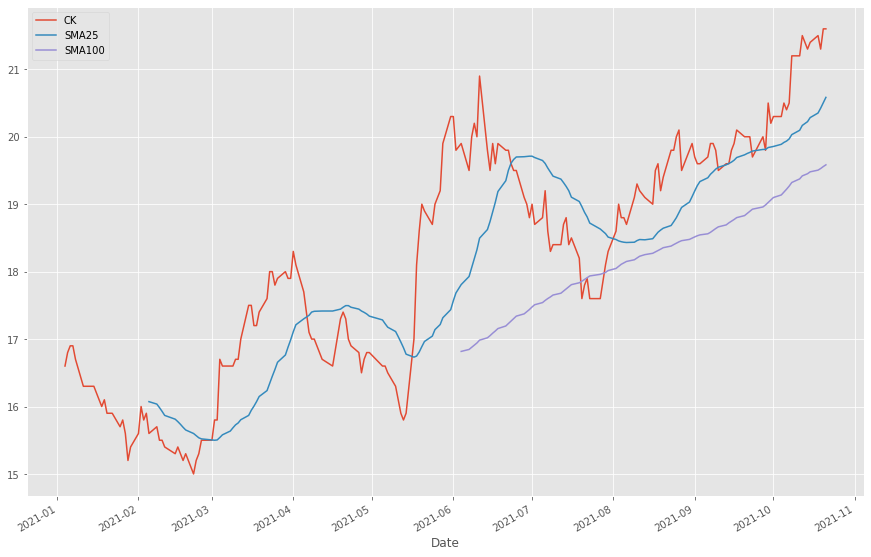

In [8]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

start = dt.datetime(2021, 1, 1) # เปลี่ยน start date จาก 2015 เป็น 2020(จากต้นปีที่แล้ว)
end = dt.datetime.now()
df = web.DataReader("CK.BK", 'yahoo', start, end)
print(df.tail())
close = df['Close']
mavg1 = close.rolling(window=25).mean()
mavg2 = close.rolling(window=100).mean()
mpl.rc('figure', figsize=(15, 10)) # เปลี่ยนขนาด (แนวนอน, แนวตั้ง)
mpl.style.use('ggplot')
close.plot(label='CK')
mavg1.plot(label='SMA25')
mavg2.plot(label='SMA100')
plt.legend()
plt.show()

# สังเกตที่เส้นสีน้ำเงิน ไม่ได้เริ่มพร้อมกับเส้นสีแดง และเส้นสีม่วงก็เช่นเดียวกัน
# เส้นสีน้ำเงินจะเริ่มวันที่ 25 เพราะค่าเฉลี่ยเคลื่อนที่ 25 วัน
# เส้นสีม่วงจะเริ่มวันที่ 100 เพราะค่าเฉลี่ยเคลื่อนที่ 100 วัน

### Example 2

In [2]:
# "" double quote '' single quote
import datetime as dt
import pandas as pd
import pandas_datareader.data as web

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = web.DataReader(["ADVANC.BK","CK.BK","DTAC.BK","SCB.BK","SAWAD.BK"],'yahoo', start, end)['Close'] # ดึงข้อมูลจาก web
df.columns = ['ADVANC','CK','DTAC','SCB','SAWAD']
returns = df.pct_change() # แสดงข้อมูล % ตวามเปลี่ยนแปลงของหลักทรัพย์แต่ละตัวว่าเพิ่มขึ้นหรือลดลงกี่ %
print(returns)
# NAN ย่อมาจาก Not A Number ไม่มีข้อมูลให้แสดง
corr = returns.corr() # เอาตาราง return มาคำนวน correlation table (.corr) สหสัมพันธ์ เชิงบวก เชิงลบ
print(corr)
# เราดูแค่ด้านบนของแนวแทยง เป็นทิศทางเดียวกันเชิงบวก แปลว่าทิศทางเดียวกันหมดเลย
# advanc กับ dtac ปานกลาง(จริงๆปานกลางประมาณ 0.5 ขึ้นไป) รองลงมาเป็น CK กับ SCB  เป็น 2 คู่ที่เยอะกว่าตัวอื่น
# advanc กับ dtac ค่อนข้างจะเป็นไปทางเดียวกัน
# ทีเ่หลือเป็นระดับต่ำหมด (เข้าไกล้ 0 แสดงว่าไม่มีสหสัมพันธ์)

              ADVANC        CK      DTAC       SCB     SAWAD
Date                                                        
2015-01-05       NaN       NaN       NaN       NaN       NaN
2015-01-06 -0.008032  0.000000 -0.010471 -0.022346  0.016260
2015-01-07  0.024291  0.030000 -0.013228  0.017143  0.050000
2015-01-08 -0.011858  0.019417  0.005362  0.022472  0.057143
2015-01-09 -0.008000 -0.009524 -0.002667  0.013736  0.027027
...              ...       ...       ...       ...       ...
2021-10-18 -0.002625  0.004673 -0.006061  0.004065 -0.003937
2021-10-19 -0.015789 -0.009302 -0.024390 -0.008097  0.003953
2021-10-20  0.005348  0.014085 -0.006250  0.024490  0.003937
2021-10-21  0.000000  0.000000  0.000000 -0.011952  0.003922
2021-10-25  0.002660 -0.009259 -0.025157  0.000000 -0.003906

[1657 rows x 5 columns]
          ADVANC        CK      DTAC       SCB     SAWAD
ADVANC  1.000000  0.216356  0.495801  0.254254  0.176108
CK      0.216356  1.000000  0.239472  0.381784  0.315178
DTAC    0.4

### Example 3

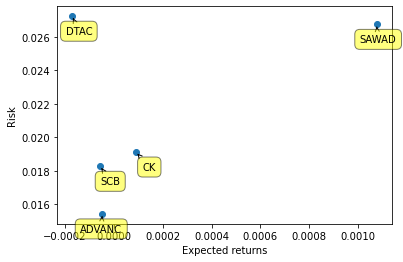

In [3]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt

# ตั้ง date time start และ end เหมือนเดิม
start = dt.datetime(2015, 1, 1) 
end = dt.datetime.now()
# ดูราคา close เหมือนเดิม
df = web.DataReader(["ADVANC.BK","CK.BK","DTAC.BK","SCB.BK","SAWAD.BK"],'yahoo', start, end)['Close'] 
df.columns = ['ADVANC','CK','DTAC','SCB','SAWAD']
# คำนวน %change จากราคาปิดก่อนหน้า
returns = df.pct_change()
# plot scatter plot หรือแผนภาพกระจาย
plt.scatter(returns.mean(), returns.std()) 
# คำนวน mean (ค่าเฉลี่ยของการเปลี่ยนแปลงราคาปิด)และ std (ค่าความเสี่ยง)ของ returns ของแต่ละคอลัมน์ เอาสองค่านี้มาทำ scatter plot
# x กับ y label ใช้กำหนดชื่อแกน
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show() # เพื่อโชว์กราฟ
# DTAC เสี่ยงสูงแต่ผลตอบแทนต่ำ
# SWAD high risk high return
# ADVANCE ความเสี่ยงต่ำสุด